Import Libraries

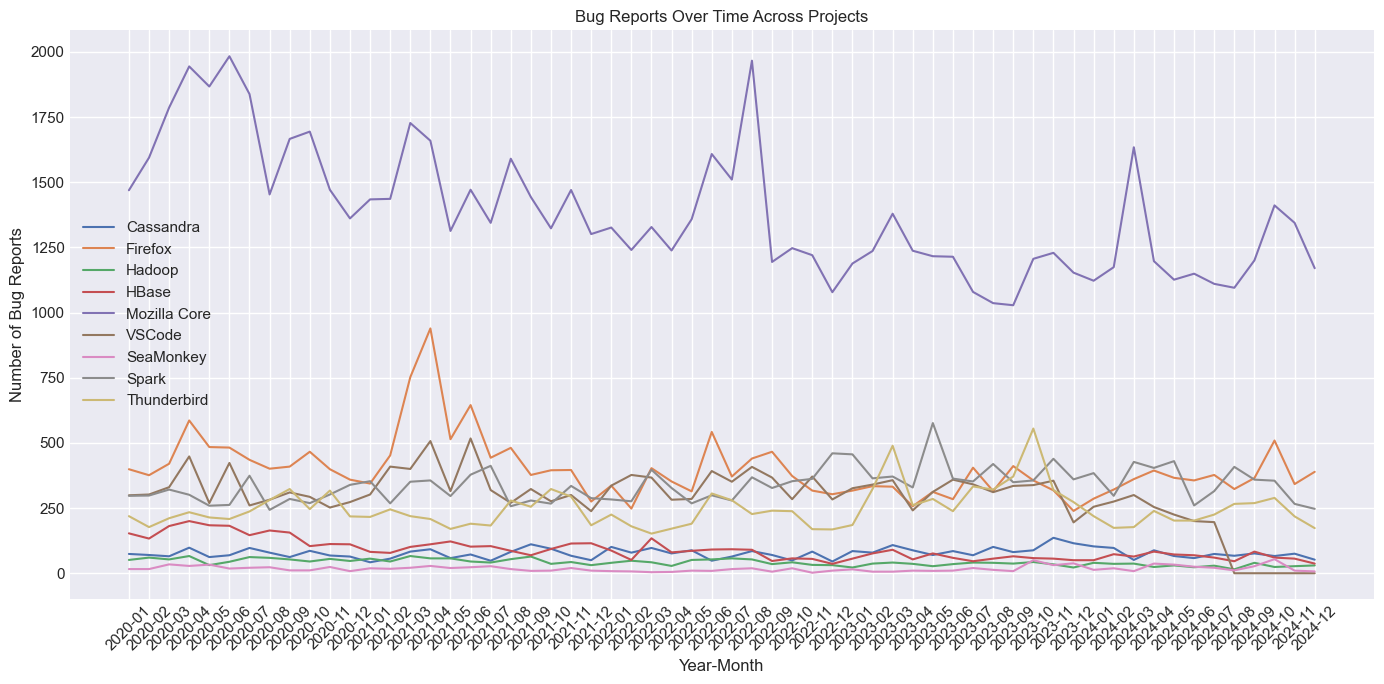

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets
import warnings
warnings.filterwarnings('ignore')


datasets = {
    'Cassandra': 'cassandra/cassandra_bugs.csv',
    'Firefox': 'firefox/Firefox_bugs.csv',
    'Hadoop': 'hadoop/hadoop_bugs.csv',
    'HBase': 'hbase/hbase_bugs.csv',
    'Mozilla Core': 'mozillacore/Core_bugs.csv',
    'VSCode': 'ms_vscode_bugs/vscode_bugs.csv',
    'SeaMonkey': 'seamonkey/SeaMonkey_bugs.csv',
    'Spark': 'spark/spark_bugs.csv',
    'Thunderbird': 'thunderbird/Thunderbird_bugs.csv'
}

# Dictionary to store bug trends
bug_trends = {}

for project, path in datasets.items():
    df = pd.read_csv(path)

    # Parse dates
    df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
    df = df.dropna(subset=['Created'])

    # Skip bug reports from 2025
    df = df[df['Created'].dt.year != 2025]

    # VS Code: include only reports from 2020
    if project == 'VSCode':
        df = df[df['Created'].dt.year >= 2020]

    # Extract Year-Month
    df['YearMonth'] = df['Created'].dt.to_period('M')

    # Count bugs per month
    trend = df['YearMonth'].value_counts().sort_index()
    bug_trends[project] = trend

# Combine all trends into one DataFrame
all_trends_df = pd.DataFrame(bug_trends).fillna(0)

# Plotting
plt.figure(figsize=(14, 7))

for project in all_trends_df.columns:
    plt.plot(all_trends_df.index.astype(str), all_trends_df[project], label=project)

plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Bug Reports')
plt.title('Bug Reports Over Time Across Projects')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('bug_trends.png')


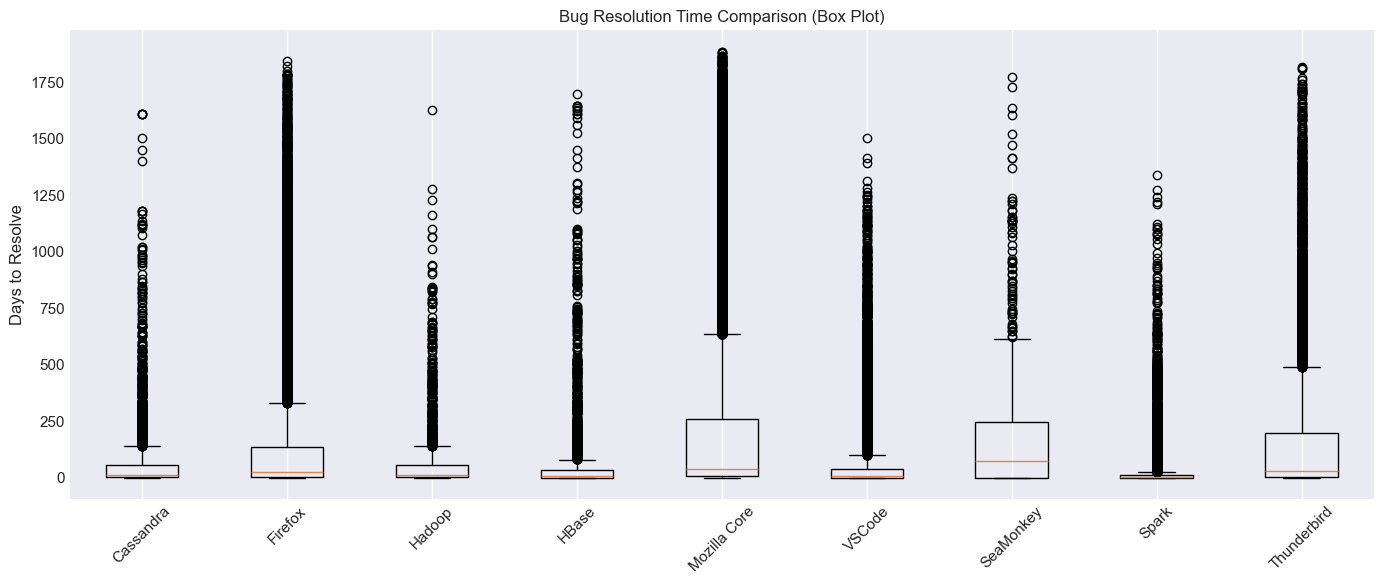

In [79]:
resolution_data = {}

for project, path in datasets.items():
    df = pd.read_csv(path)

    df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
    df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')
    df = df.dropna(subset=['Created', 'Resolved'])

    # Exclude 2025
    df = df[df['Created'].dt.year != 2025]
    if project == 'VSCode':
        df = df[df['Created'].dt.year >= 2020]

    df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days
    df = df[df['Resolution_Time'] >= 0]

    resolution_data[project] = df['Resolution_Time'].tolist()

# Plot box plots
plt.figure(figsize=(14, 6))
plt.boxplot(resolution_data.values(), labels=resolution_data.keys(), showfliers=True)
plt.xticks(rotation=45)
plt.title('Bug Resolution Time Comparison (Box Plot)')
plt.ylabel('Days to Resolve')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


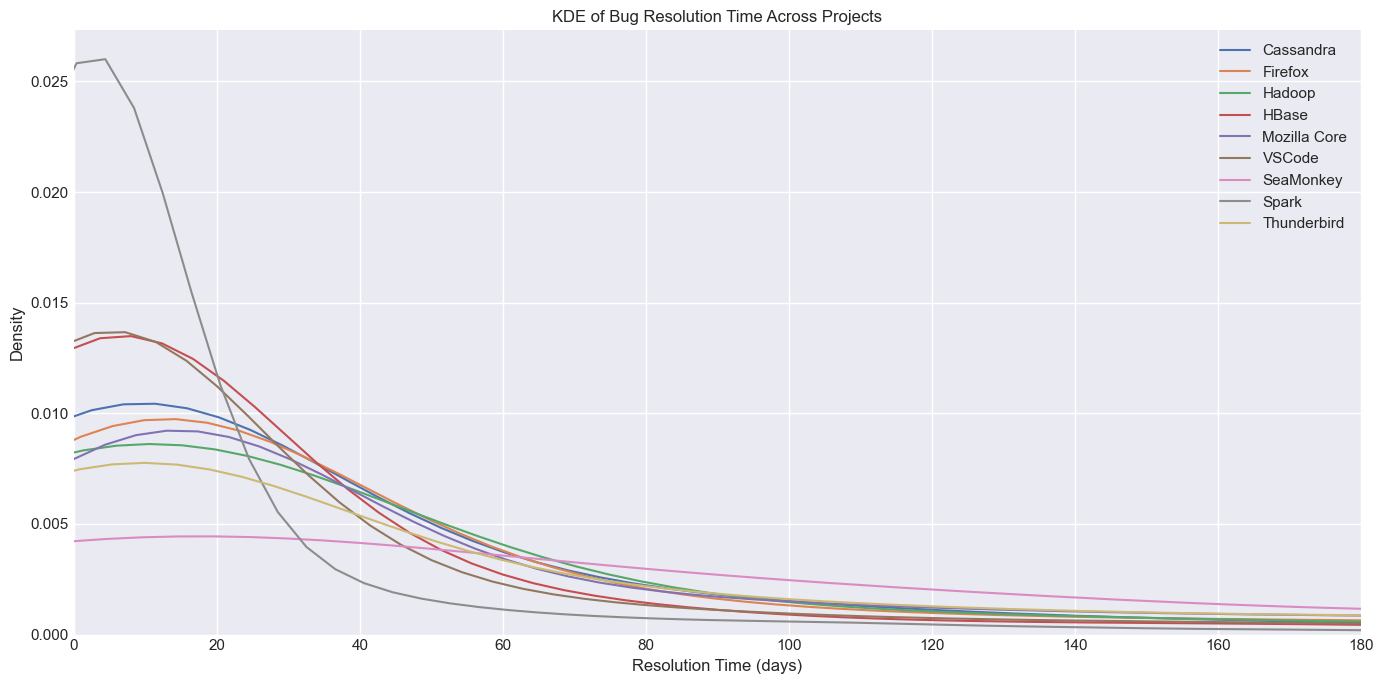

In [80]:
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-darkgrid')

for project, path in datasets.items():
    df = pd.read_csv(path)

    df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
    df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

    df = df.dropna(subset=['Created', 'Resolved'])
    df = df[df['Created'].dt.year != 2025]

    if project == 'VSCode':
        df = df[df['Created'].dt.year >= 2020]

    resolution_days = (df['Resolved'] - df['Created']).dt.days
    resolution_days = resolution_days[(resolution_days >= 0) & (resolution_days <= 365 * 2)]

    if not resolution_days.empty:
        sns.kdeplot(resolution_days, label=project, bw_adjust=1.2, linewidth=1.5)

plt.xlabel('Resolution Time (days)')
plt.ylabel('Density')
plt.title('KDE of Bug Resolution Time Across Projects')
plt.xlim(0, 180)  # Optional: remove for full range
plt.legend()
plt.tight_layout()
plt.savefig('kde_resolution_time.png')
